Step 03: the PSG data has segmented with 30 seconds window size. The segmented data is further decomposed into frequency sub-bands such as alpha, theta and delta. For dividing the segmented data into sub-bands, the butterworth bandpass filter is used to compute the coefficient of each band, and then digital filter is applied in order to get the desired band. At the end, results of sub-bands are plotted.

In [1]:
import pyedflib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.stats import entropy

In [2]:
data = pyedflib.EdfReader('./PSG_dataset/A0000724.edf') # reading PSG file

In [3]:
fs = 100 # sampling frequency
window_s = 30 # 30 seconds

In [4]:
def segmentation(indata, window_s):

    window = indata.getSampleFrequency(0)*window_s # 100 sampling frequency * 30 seconds
    # computing number of segments
    nseg = int(len(indata.readSignal(0))/window) 
    # segmentation of channel 1 with window size 30 seconds
    data_seg = np.array([indata.readSignal(0,(i*window),window) for i in range(nseg)])
    return data_seg

In [5]:
data_seg = segmentation(data, window_s)
print('Shape of channel without segmenting: {}' .format(np.shape(data.readSignal(0)))) 
print('Shape of segmented channel: {}' .format(np.shape(data_seg)))

Shape of channel without segmenting: (2862500,)
Shape of segmented channel: (954, 3000)


In [6]:
len(data_seg[0])

3000

In [7]:
# butterworth band-pass filter reference link: https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html

def butter_bandpass_filter(indata, lowcut, highcut, fs):
    
    nyq = 0.5 * fs 
    low = lowcut / nyq
    high = highcut / nyq
    # taking filter coefficients
    b, a = butter(4, [low, high], btype='bandpass') # filter order = 4
    # applying filter
    data_filt = filtfilt(b, a, indata)
    
    return data_filt

(3000,)


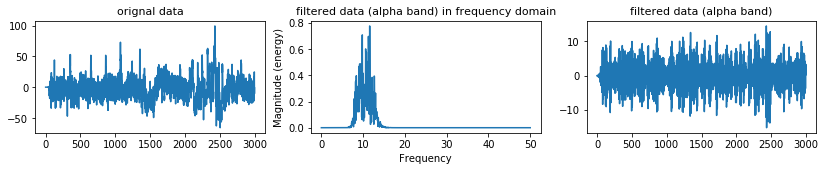

In [34]:
# extracting alpha band

lowcut = 8 # lower cutoff frequency
highcut = 13 # higher cutoff frequency
data_alpha = butter_bandpass_filter(data_seg[0], lowcut, highcut, fs)
print(data_alpha.shape)

plt.subplots(figsize=(14,7))
plt.subplot((331))
plt.plot(data_seg[0])
plt.title('orignal data', fontdict = {'fontsize' : 11})

plt.subplot((332))
plt.magnitude_spectrum(data_alpha, fs)
plt.title('filtered data (alpha band) in frequency domain', fontdict = {'fontsize' : 11})

plt.subplot((333))
plt.plot(data_alpha)
plt.title('filtered data (alpha band)', fontdict = {'fontsize' : 11})

plt.show()

(3000,)


Text(0.5, 1.0, 'filtered data (theta band) in frequency domain')

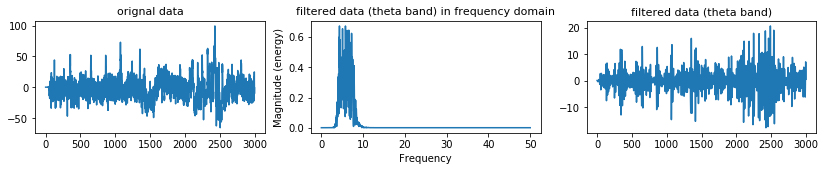

In [37]:
# taking theta band
lowcut = 4 #lower cutoff frequency
highcut = 8 #higher cutoff frequency
data_theta = butter_bandpass_filter(data_seg[0], lowcut, highcut, fs)
print(data_theta.shape)

plt.subplots(figsize=(14,7))
plt.subplot((331))
plt.plot(data_seg[0])
plt.title('orignal data', fontdict = {'fontsize' : 11})

plt.subplot((333))
plt.plot(data_theta)
plt.title('filtered data (theta band)', fontdict = {'fontsize' : 11})

plt.subplot((332))
plt.magnitude_spectrum(data_theta, fs)
plt.title('filtered data (theta band) in frequency domain', fontdict = {'fontsize' : 11})

In [36]:
# taking delta band
lowcut = 0.5 #lower cutoff frequency
highcut = 4 #higher cutoff frequency
data_delta = butter_bandpass_filter(data_seg[0], lowcut, highcut, fs)
print(data_delta.shape)

plt.subplots(figsize=(14,7))
plt.subplot((331))
plt.plot(data_seg[0])
plt.title('orignal data', fontdict = {'fontsize' : 11})

plt.subplot((333))
plt.plot(data_delta)
plt.title('filtered data (delta band)', fontdict = {'fontsize' : 11})

plt.subplot((332))
plt.magnitude_spectrum(data_delta, fs)
plt.title('filtered data (delta band) in frequency domain', fontdict = {'fontsize' : 11})

(3000,)


Text(0.5, 1.0, 'filtered data (delta band) in frequency domain')